# 데이터 전처리(분류, 회귀, 군집화 모두 똑같음)

## 데이터 불러오기 

In [ ]:
import pandas as pd

# Load the dataset
file_path = '파일 경로로'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


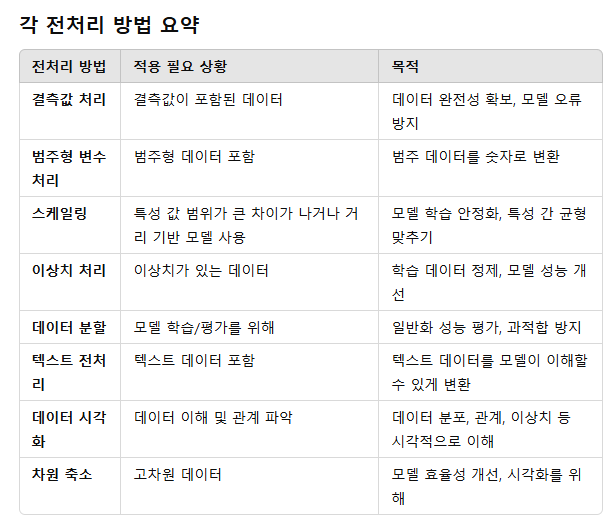






### 1. 결측값 처리

1) 목적
- 모델이 결측값 때문에 오류를 일으키지 않도록 데이터를 정리.
- 결측값은 모델 학습에 방해가 될 수 있으므로 적절히 처리해야 함.
2) 적용 필요
- 데이터에 결측값(NaN)이 포함된 경우.
- 결측값 처리 방법은 데이터의 특성과 비율에 따라 다름:
3) 적용 방법
- 수치형: 평균, 중앙값 등으로 대체.
- 범주형: "Unknown" 또는 최빈값으로 대체.
- 결측 비율이 높은 행/열: 삭제.

In [ ]:
# 결측값 확인
print(data.isnull().sum())

# 수치형 열의 결측값을 해당 열의 평균으로 대체
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)
data['mpg'].fillna(data['mpg'].mean(), inplace=True)

# 텍스트형 열의 결측값을 "Unknown"으로 대체
data['origin'].fillna('Unknown', inplace=True)


# 결측값 50%이상인 행 삭제
# 각 행의 결측값 비율 계산
row_missing_percentage = data.isnull().mean(axis=1) * 100

# 결측값 비율이 50% 이상인 행 삭제
rows_to_drop = row_missing_percentage[row_missing_percentage >= 50].index
data.drop(index=rows_to_drop, inplace=True)

# 변경된 데이터 확인
print(data.isnull().sum())



### 2. 범주형 변수 처리
1) 목적
- 머신러닝 모델은 숫자 데이터를 처리하므로, 범주형 데이터는 숫자로 변환해야 함.
- 모델에 적합한 형식으로 변환.
2) 적용 필요
- 데이터에 범주형 열(예: 'origin', 'gender')이 있을 때.
3) 선택 방법:
- 원-핫 인코딩: 범주 간 순서가 없을 때.
- 라벨 인코딩: 범주 간 순서가 있을 때.

In [ ]:
# 'origin' 열을 원-핫 인코딩
data = pd.get_dummies(data, columns=['origin'], drop_first=True)




from sklearn.preprocessing import LabelEncoder

# 'origin' 열을 라벨 인코딩 (1, 2, 3으로 변환)
label_encoder = LabelEncoder()
data['origin'] = label_encoder.fit_transform(data['origin'])


### 3. 스케일링
1) 목적
- 특성(feature)의 값 범위를 일정하게 만들어 모델 학습을 안정화.
- 값 범위가 큰 차이가 나는 경우(예: Income: $5000~$100000 vs Age: 20~60) 큰 값이 모델 학습에 과도한 영향을 줌.
2) 적용 필요
아래와 같은 경우 필수:
- 거리 기반 알고리즘: KNN, KMeans, SVM, PCA.
- 기울기 기반 알고리즘: Linear Regression, Logistic Regression, Neural Networks.

3) 스케일링 방법:

- 표준화(Standardization): 평균=0, 표준편차=1로 조정.
- 정규화(Normalization): 값을 0~1 사이로 변환.

In [ ]:
#표준화
from sklearn.preprocessing import StandardScaler

# 수치형 데이터 열만 적기
numeric_cols = ['mpg', 'horsepower', 'weight', 'acceleration', 'model year', 'cylinders']

# 표준화
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())

In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print(data.head())


### 4. 이상치 처리

1) 목적
- 이상치(Outlier)가 모델 학습에 과도한 영향을 미치는 것을 방지.
- 이상치는 통계적으로 평균/분포와 동떨어진 값.
2) 적용 필요
- 데이터에 이상치가 포함된 경우(예: 박스플롯, IQR로 탐지).
- 이상치를 처리하지 않으면 다음 문제가 발생할 수 있음:
- 거리 기반 알고리즘(KNN, KMeans)에서 이상치가 잘못된 중심으로 작용.
- 회귀 모델에서 과도한 영향 발생.

In [ ]:
# IQR을 이용해 이상치 탐지
Q1 = data['horsepower'].quantile(0.25)
Q3 = data['horsepower'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치가 아닌 값만 필터링
data_no_outliers = data[(data['horsepower'] >= lower_bound) & (data['horsepower'] <= upper_bound)]

print(data_no_outliers.head())


### 5. 데이터 분할

1) 목적
- 데이터를 훈련용과 테스트용으로 분리하여 모델의 일반화 성능 평가.
- 과적합(Overfitting)을 방지하기 위해 필수.
2) 적용 필요
- 모든 머신러닝/딥러닝 모델에 필수.
- 일반적으로 훈련용 80%, 테스트용 20%로 분리.

In [ ]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 변수 분리
# 타겟변수는 모델이 예측해야 하는 결과값
X = data.drop(columns=['mpg'])  # 타겟 변수 'mpg' 제외
y = data['mpg']

# 데이터 분할 (훈련용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


### 6. 텍스트형 데이터 전처리
1) 목적
- 텍스트 데이터를 숫자로 변환하여 머신러닝 모델에서 사용할 수 있도록 처리.
- 텍스트 데이터에서 중요한 특징을 추출.
2) 적용 필요
- 데이터에 텍스트 열(예: 'car_name')이 포함된 경우.
3) 전처리 단계:
- 특수문자 제거, 소문자 변환 등 기본 전처리.
- TF-IDF, Word2Vec 등을 사용해 벡터화.
 

In [ ]:
import re

# 예시 텍스트 열 처리 (가정: 'car_name' 열이 텍스트형 데이터)
def preprocess_text(text):
    text = text.lower()  # 소문자 변환
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # 특수 문자 제거
    return text

data['car_name'] = data['car_name'].apply(preprocess_text)

print(data['car_name'].head())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 텍스트 데이터를 TF-IDF 벡터로 변환
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(data['car_name'])

print(X_text.shape)  # 벡터화된 데이터의 크기

### 7. 데이터 시각화
1) 목적
- 데이터의 분포, 관계, 이상치 등을 직관적으로 파악.
- 데이터가 모델에 적합한지 확인(예: 선형 관계, 비선형 관계 등).
2) 적용 필요
- EDA(탐색적 데이터 분석) 단계에서 필수.
예:
- 산점도: 회귀 모델에서 타겟 변수와 독립 변수 간 관계 확인.
- 박스플롯: 이상치 탐지.
- 히스토그램: 데이터 분포 확인.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'mpg'와 'horsepower'의 관계 시각화
sns.scatterplot(x=data['horsepower'], y=data['mpg'])
plt.title('Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()


In [ ]:
## 회귀 데이터 선형성 확인을 위한 산점도 그리기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
file_path = 'auto-mpg.csv'
data = pd.read_csv(file_path)

# 특성과 타겟 변수 선택
X = data['horsepower'] #특성
y = data['mpg'] # 타겟변수

# 선형 관계 산점도
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title("Scatter Plot: Horsepower vs MPG (Linear)")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()

# 비선형 관계 산점도 예시 (weight vs mpg)
X_nonlinear = data['weight']
y_nonlinear = data['mpg']

plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear, y_nonlinear, color='red', alpha=0.7)
plt.title("Scatter Plot: Weight vs MPG (Nonlinear)")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()


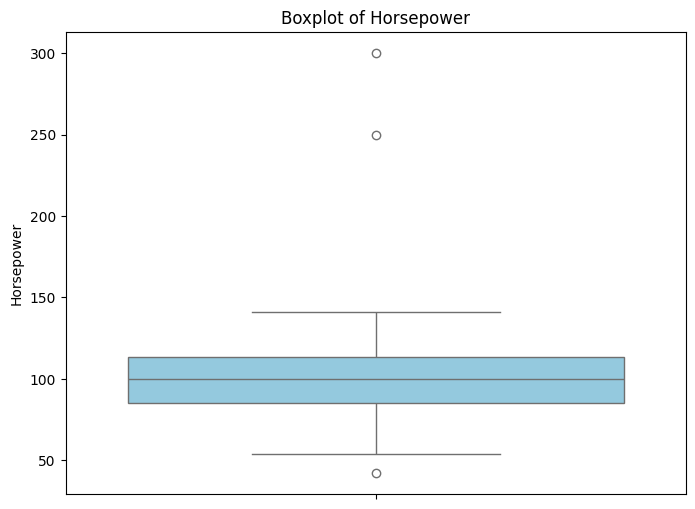

In [1]:
# 박스 플롯롯
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터
import numpy as np
import pandas as pd
data = pd.DataFrame({
    'horsepower': np.random.normal(100, 20, 100).tolist() + [250, 300]  # 이상치 포함
})

# 박스플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='horsepower', color='skyblue')
plt.title('Boxplot of Horsepower')
plt.ylabel('Horsepower')
plt.show()


1) 박스플롯
- 상자: Q1(25%) ~ Q3(75%)의 데이터 범위를 나타냄.
- 중앙선: 중앙값(Median, Q2)을 표시.
- 수염(Whiskers): 데이터의 IQR(사분위수 범위)를 기반으로 최소/최대값을 표시.
- 점: 이상치(outlier)를 나타냄.

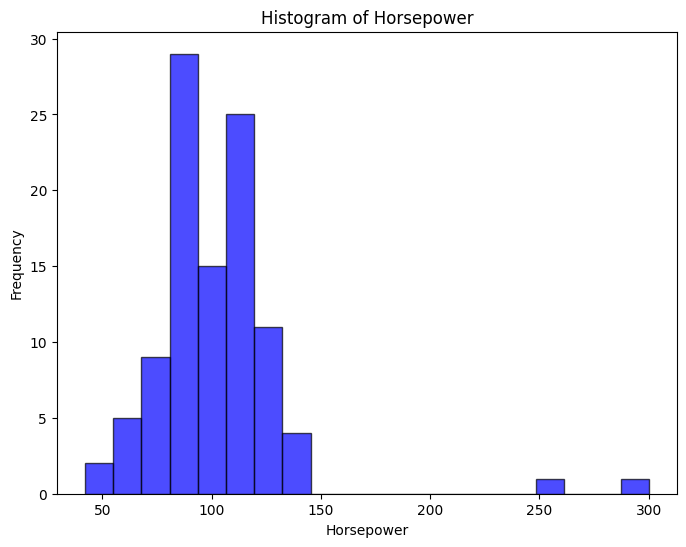

In [2]:
# 히스토그램 시각화
plt.figure(figsize=(8, 6))
plt.hist(data['horsepower'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()


2) 히스토그램
- 데이터의 빈도(frequency)를 막대(bin)로 나타냄.
- X축: 데이터 값의 범위.
- Y축: 각 구간(bin)에 속하는 데이터의 개수.

### 8. 차원 축소
1) 목적
- 높은 차원의 데이터를 저차원으로 축소하여 시각화하거나 모델 효율성 개선.
- 데이터의 차원이 높으면 학습이 느려지고 과적합 위험 증가.
2) 적용 필요
- 데이터에 많은 특성이 포함되어 있고, 일부 특성이 상관관계를 가질 때.
- PCA, t-SNE 등 차원 축소 기법 사용.


In [ ]:
from sklearn.decomposition import PCA

# PCA를 사용한 차원 축소
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)


### 상관관계 보기

- 히트맵에서 SalePrice 열을 기준으로 각각의 변수와 색상(빨강, 파랑)을 보면:

1. 색상이 짙은 빨강일수록 강한 양의 상관관계.
2. 색상이 짙은 파랑일수록 강한 음의 상관관계.
3. 색상이 흰색 또는 옅은 파랑일수록 상관관계가 약함.

- 강한 상관관계: 절대값이 0.7 이상.
: 변수 간에 강한 선형적 관계가 있음.
- 예: OverallQual, GrLivArea, TotalBsmtSF, GarageCars.

- 중간 상관관계: 절대값이 0.3 ~ 0.7.
: 변수 간에 어느 정도 관계가 있지만 강하지 않음.
- 예: YearBuilt, 1stFlrSF, FullBath.

- 약한 상관관계 또는 무관: 절대값이 0.0 ~ 0.3.
: 변수 간에 관계가 거의 없음.
- 예: PoolArea, MiscVal, LowQualFinSF.

Top features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


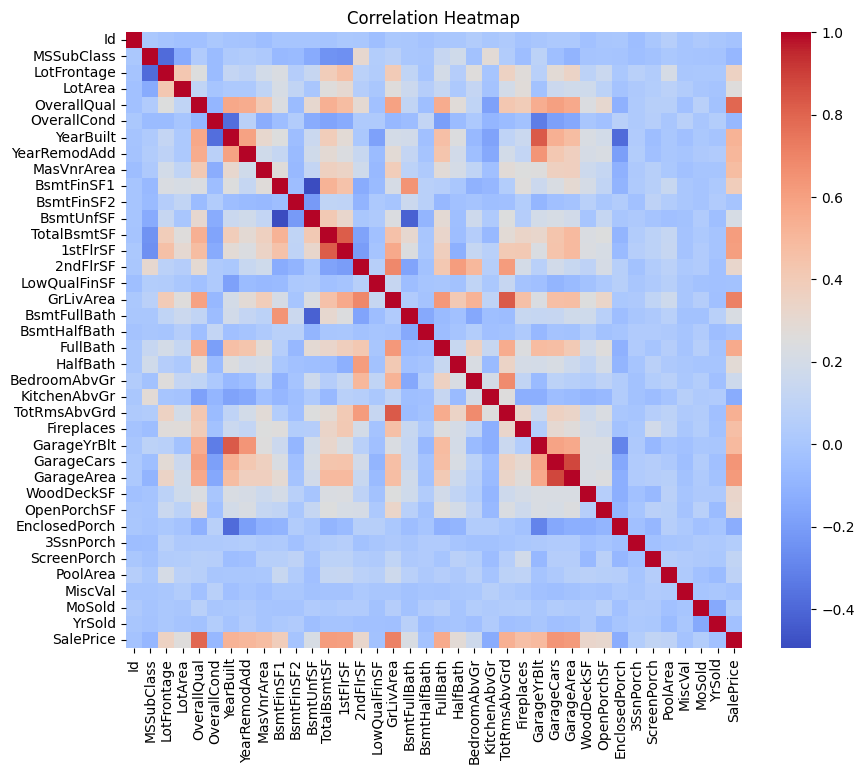

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# 데이터 로드
file_path = 'C:/VSCODE/ML/exemple/train_Re.csv'
house_data = pd.read_csv(file_path)

# 수치형 변수만 선택
numeric_features = house_data.select_dtypes(include=['int64', 'float64'])

# SalePrice와의 상관계수 계산
correlation_matrix = numeric_features.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# 상위 10개 특성 출력
print("Top features correlated with SalePrice:")
print(saleprice_corr.head(10))

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 찾아야 하는 변수 열에 빨간 표시들 위주로 보기